# Exploratory Data Analysis on Supermarket dataset

Link to the dataset- https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [1]:
# all the imports

import pandas as pd
import numpy as np # computing library
import matplotlib.pyplot as plt ## visualization library
import seaborn as sns
import calmap # heatmap library


import warnings
warnings.filterwarnings('ignore')

## Step 1: Preparing and Understanding the Dataset

In [2]:
# opening the csv file as a dataframe
df = pd.read_csv('./supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.tail(8)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
df.shape

(1000, 17)

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Checking duplicate rows and missing values

In [7]:
## to find if there is any row that is duplicated and sum the number of dupliated rows
df.duplicated().sum() 

0

In [8]:
## to see the missing value

df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
round(df.describe(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [10]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [11]:
# fixing the Date column
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.set_index('Date', inplace = True)

# UNIVARIATE ANALYSIS


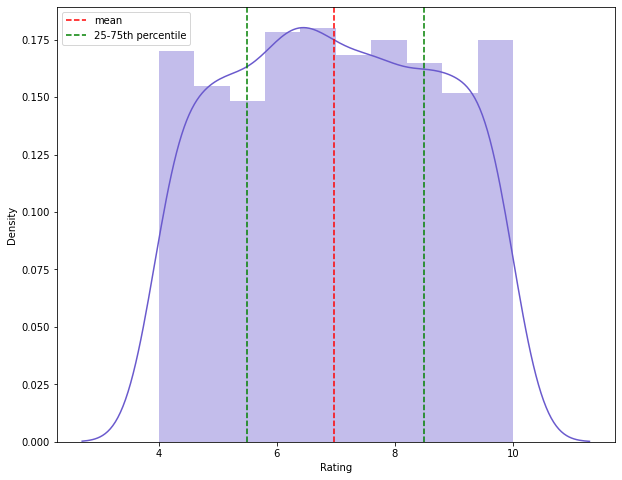

In [13]:
# checking if the customer rating is skewed


# to set the figuresize
plt.figure(figsize=(10,8))

# for distribution plot
sns.distplot(df['Rating'], color='slateblue')  
# plotting the mean
plt.axvline(x=np.mean (df['Rating']), c='red' , ls='--' ,label= 'mean') 
# plotting the 25th percentile
plt.axvline(x=np.percentile(df['Rating'],25) , c ='green', ls = '--', label ='25-75th percentile' ) 
# plotting the 75th percentile
plt.axvline(x=np.percentile(df['Rating'],75), c='green', ls='--',) 
plt.legend()

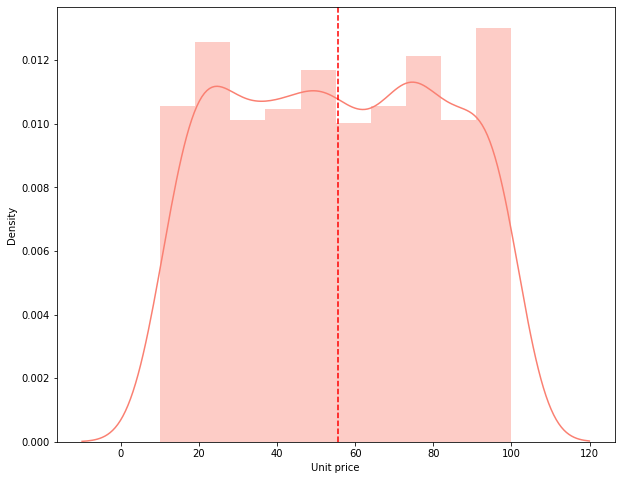

In [14]:
# to set the figuresize
plt.figure(figsize=(10,8))


sns.distplot(df['Unit price'], color='salmon')
plt.axvline(x=np.mean(df['Unit price']), c ='red', ls = '--')

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 720x576 with 0 Axes>

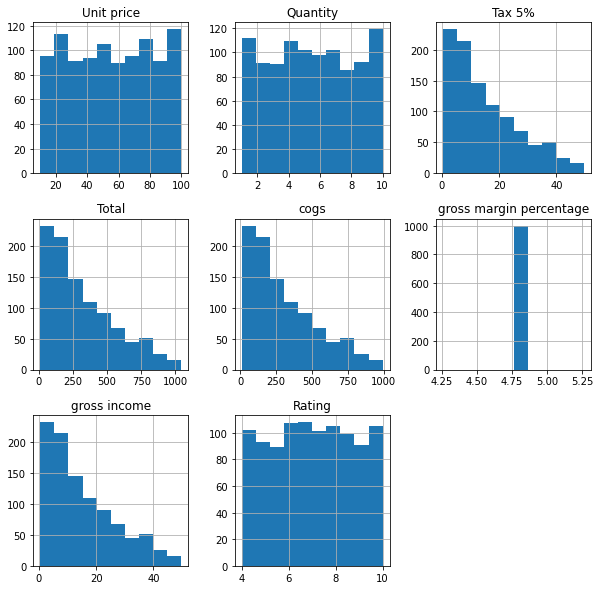

In [15]:
# plotting all the columns


# to set the figuresize
plt.figure(figsize=(10,8))

df.hist(figsize = (10,10))

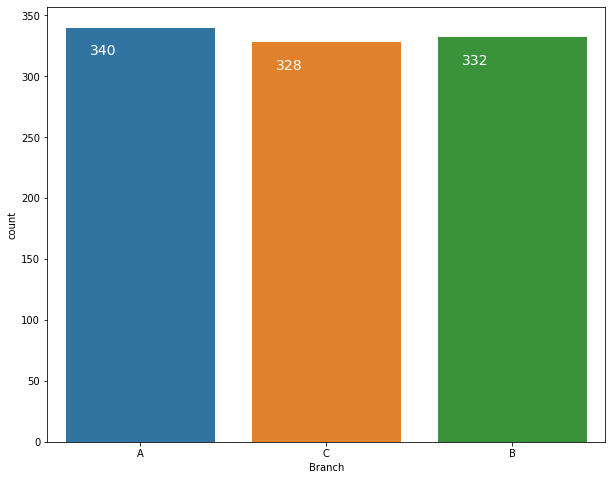

In [16]:
# to set the figuresize
plt.figure(figsize=(10,8))

plot = sns.countplot(df.Branch)


# to annotate the exact numbers
for p in plot.patches:
    plot.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
    

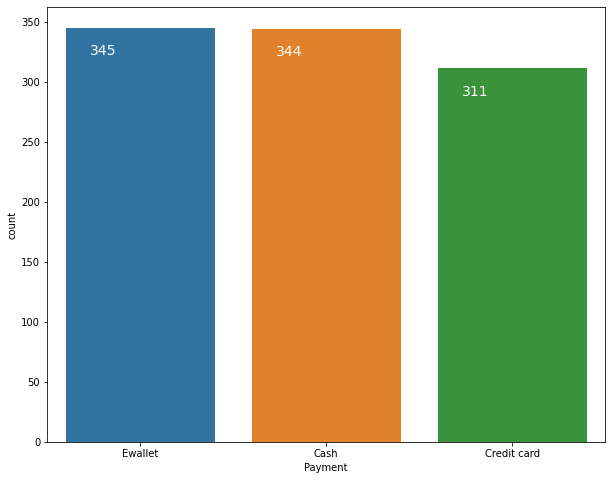

In [17]:
# to set the figuresize
plt.figure(figsize=(10,8))

plot = sns.countplot(df.Payment)

# to annotate the exact numbers
for p in plot.patches:
    plot.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
    

## BIVARIATE ANALYSIS


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

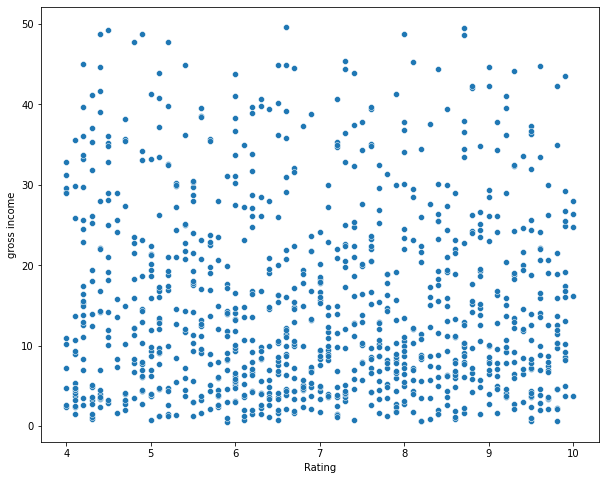

In [18]:
# to set the figuresize
plt.figure(figsize=(10,8))

sns.scatterplot(df['Rating'],df['gross income'], palette='rainbow')

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

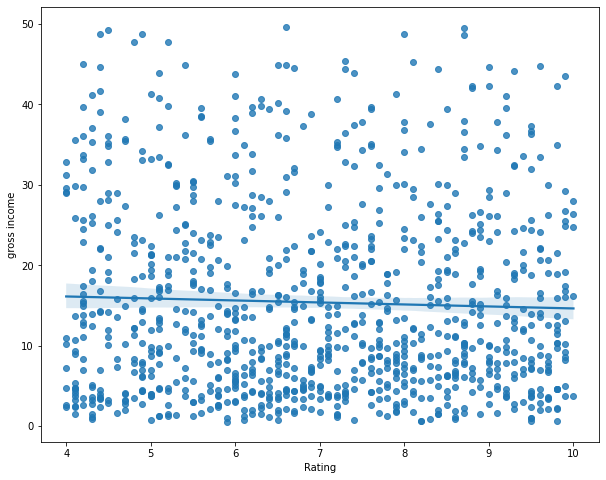

In [19]:
# to set the figuresize
plt.figure(figsize=(10,8))


sns.regplot(df['Rating'],df['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

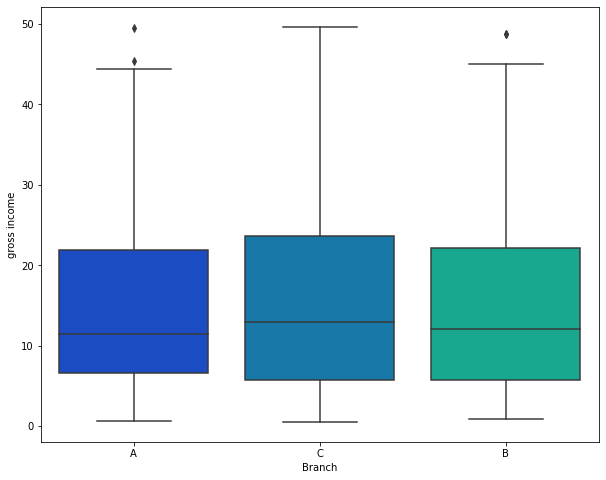

In [20]:
# to set the figuresize
plt.figure(figsize=(10,8))

sns.boxplot(x = df['Branch'], y = df['gross income'], palette='winter')

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

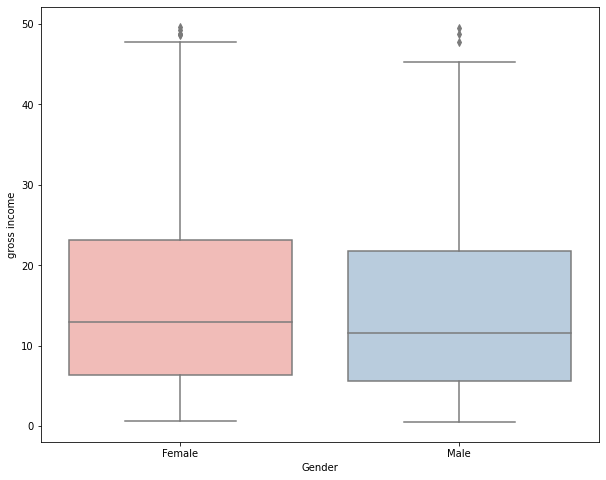

In [21]:
# to set the figuresize
plt.figure(figsize=(10,8))


sns.boxplot(x=df['Gender'],y=df['gross income'], palette='Pastel1')

<AxesSubplot:xlabel='Date', ylabel='gross income'>

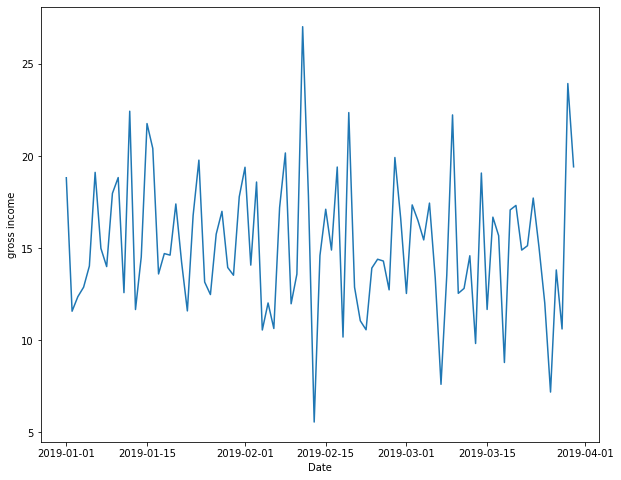

In [22]:
# to set the figuresize
plt.figure(figsize=(10,8))


sns.lineplot(x=df.groupby(df.index).mean().index,
             y=df.groupby(df.index).mean()['gross income'] )


# CORRELATION ANALYSIS

In [23]:
np.corrcoef(df['gross income'],df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [24]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<AxesSubplot:>

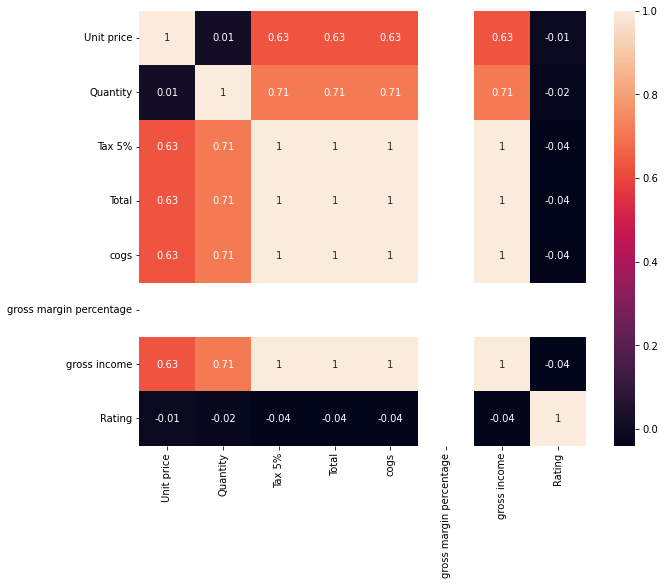

In [25]:
# to set the figuresize
plt.figure(figsize=(10,8))

sns.heatmap(np.round(df.corr(),2),annot= True)